# 실습1. 마켓과 머신러닝

## 생선 분류 문제
- 마켓에 들어온 생선의 크기 정보를 입력하면 자동으로 생선이름 알려주기  
 
 
- 도미에 대한 정보안다면? "30~40cm 길이의 생선은 도미"

 
- 시스템이 스스로 기준을 찾으려면? 

### 도미 데이터 준비하기

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

* 도미의 길이, 무게는 도미의 특징을 나타내는 특성이라고 함
    * 통계학에서는 변수라고 부름


* 특성은 데이터를 표현하는 하나의 성질

**자료**
- 범주형 
	- 명목형
	- 순서형
- 수치형 
	- 이산형(등간형)
	- 연속형(비율형)


**[참고] 변수 유형**
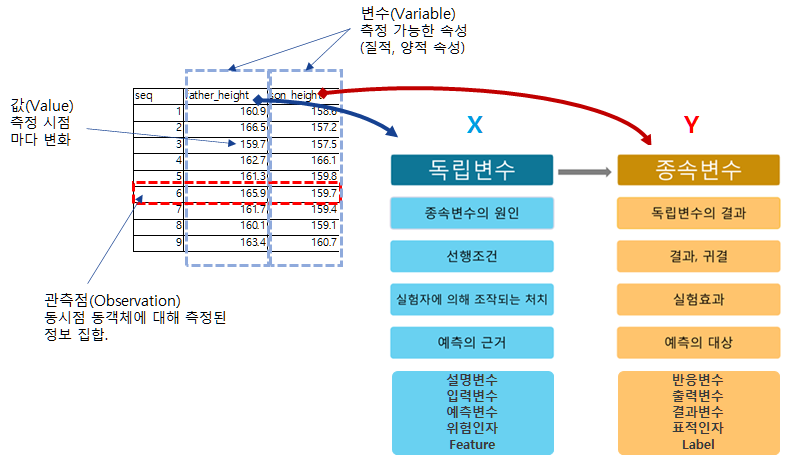

### 도미 길이와 무게 데이터에 대한 산점도

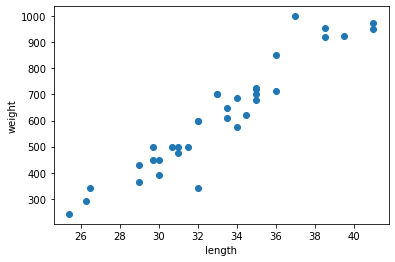

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 빙어 데이터 준비하기

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

In [4]:
len(smelt_length)

14

### 도미 데이터와 빙어 데이터 병합한 산점도

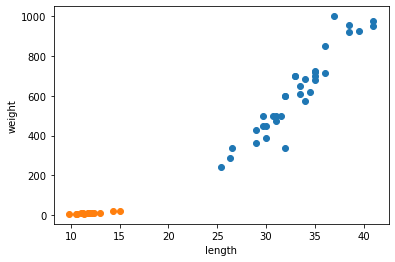

In [5]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

### 두 생선 데이터 병합

In [6]:
# 두 리스트 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
# 2차원 리스트로 변환
fish_data = [[l,w] for l,w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
len(fish_data)

49

### 타겟(레이블) 데이터 생성

In [11]:
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## K-최근접 이웃(K-Nearest Neighbor) 알고리즘을 이용한 분류

### K-최근접 이웃(K-Nearest Neighbor) 알고리즘 소개

- 테스트 데이터와 K개 훈련데이터의 y값들을 비교
- 분류와 회귀 모두 활용
    - 분류 : k개 최근접 이웃들의 class들 중 다수결 결과로 class 예측
    - 회귀 : k개 최근접 이웃들이 가지고 있는 값의 평균을 결과값으로 예측

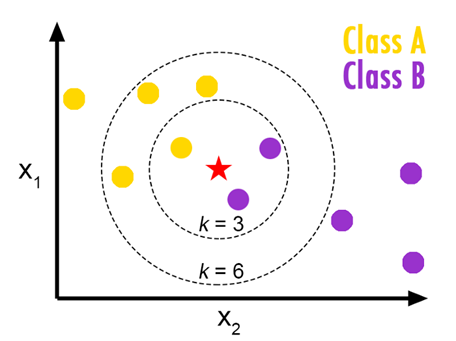

- 비모수방식이며 instance-based 알고리즘

- train과 test 세트로 데이터를 분리하지만 실제로 train은 존재하지 않는 게으른 알고리즘

- 구체적인 데이터를 가지고 예측을 요청할 때, K개 가장 가까운 사례를 train data set에서 찾아 해당하는 데이터의 y 값을 기반으로 예측 결과를 제시

- K 값 : 동점을 막기 위해 대개 홀수로 정함 
    - k가 작으면 이상치 등 노이즈에 민감하게 반응하여 과대적합 
        - k=1인 경우 가장 가까운 이웃과 같은 클래스가 할당됨
    - k가 크면 자료의 패턴을 파악할 수 없어 과소적합
        - k=N인 경우 전체 평균의 개념

- '가깝다'는 판단 기준 : **거리** (맨하탄 거리, 유클리디안 거리, 민코위스키 거리 등)

* 게으른 알고리즘이다!

### 사이킷런의 K-최근접이웃 클래스

In [12]:
# KNN모듈을 임포트
# KNN : 가장 가까운 것으로 알려줌
from sklearn.neighbors import KNeighborsClassifier

**KNeighborsClass 객체 생성**

In [13]:
# 디폴트 값 : 5
kn = KNeighborsClassifier()

**훈련(training) : fit(features, label) 메서드**

In [14]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

**모델 평가 : score() 메서드 => 정확도**

In [15]:
kn.score(fish_data, fish_target)

1.0

**정확도(accuracy)**

- 정확한 답을 몇개 맞추었는지를 백분율로 나타낸 값
-  $정확히 맞힌 개수 / 전체 데이터수$
- 1.0 = 100%

### K-최근접 이웃 알고리즘을 이용한 새로운 데이터 분류

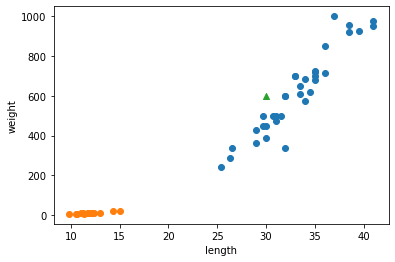

In [16]:
# (30, 600)
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
# 2차원데이터
# predict : 결과값 예측
# 1 : 도미
# 0 : 빙어
kn.predict([[30, 500], [50, 700], [5, 100]])

array([1, 1, 0])

**_fit_X  속성** : fish_data를 가지고 있음

In [19]:
# 자동으로 np형태로 바꿈, 그래서 array형태로 출력
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


**_y 속성** : fish_target 을 가지고 있음

In [20]:
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

**K-neighbors 크기 지정**

In [21]:
kn49 = KNeighborsClassifier(n_neighbors=49)

**K=49인 경우 모델 훈련 및 성능**

In [22]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

**49개 중 도미가 35개 이므로 어떤 데이터를 넣어도 무조건 도미로 예측**

In [23]:
35/49

0.7142857142857143

### 확인 문제



1. 가장 가까운 이웃을 참고하여 정답을 예측하는 알고리즘이 구현된 사이킷런 클래스는 무엇인가? 

KNeighborsClassifier()

2. 사이킷런 모델을 훈련할 때 사용하는 메서드는 무엇인가?

fit()

3. n_neighbors를 49로 설정했을 때 점수가 1.0보다 작았다. 즉, 정확도가 100%가 아니다. n_neigbors의 기본값인 5부터 49까지 바꾸어가며 점수가 1.0 아래로 내려가기 시작하는 이웃의 개수를 찾아보시오.

In [25]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for i in range(5, 50):
    kn.n_neighbors = i
    score = kn.score(fish_data, fish_target)
    if score < 1.0:
        print(i)
        break


18


In [26]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for i in range(5, 50):
    kn.n_neighbors = i
    score = kn.score(fish_data, fish_target)
    print(i, score)

5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 0.9795918367346939
19 0.9795918367346939
20 0.9795918367346939
21 0.9795918367346939
22 0.9795918367346939
23 0.9795918367346939
24 0.9795918367346939
25 0.9795918367346939
26 0.9795918367346939
27 0.9795918367346939
28 0.9591836734693877
29 0.7142857142857143
30 0.7142857142857143
31 0.7142857142857143
32 0.7142857142857143
33 0.7142857142857143
34 0.7142857142857143
35 0.7142857142857143
36 0.7142857142857143
37 0.7142857142857143
38 0.7142857142857143
39 0.7142857142857143
40 0.7142857142857143
41 0.7142857142857143
42 0.7142857142857143
43 0.7142857142857143
44 0.7142857142857143
45 0.7142857142857143
46 0.7142857142857143
47 0.7142857142857143
48 0.7142857142857143
49 0.7142857142857143




### [마무리]

- 특성
- k-최근접 이웃 알고리즘
- 정확도

### 핵심 패키지와 함수
**scikit-learn**

- KNeighborsClassifier()
- fit()
- predict()
- score()